In [2]:

import numpy as np
import pandas as pd
import datetime
from datetime import date
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler, normalize
from sklearn import metrics
from sklearn.mixture import GaussianMixture
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import warnings
warnings.filterwarnings('ignore')
data=pd.read_csv('startup_data.csv')

In [3]:
data.head()

,Startup Name,Industry,Funding Rounds,Funding Amount (M USD),Valuation (M USD),Revenue (M USD),Employees,Market Share (%),Profitable,Year Founded,Region,Exit Status
0,Startup_1,IoT,1,101.09,844.75,67.87,1468,5.20,0,2006,Europe,Private
1,Startup_2,EdTech,1,247.62,3310.83,75.65,3280,8.10,1,2003,South America,Private
2,Startup_3,EdTech,1,109.24,1059.37,84.21,4933,2.61,1,1995,South America,Private
3,Startup_4,Gaming,5,10.75,101.90,47.08,1059,2.53,0,2003,South America,Private
4,Startup_5,IoT,4,249.28,850.11,50.25,1905,4.09,0,1997,Europe,Acquired


In [ ]:
data.dtypes

,0
Startup Name,object
Industry,object
Funding Rounds,int64
Funding Amount (M USD),float64
Valuation (M USD),float64
Revenue (M USD),float64
Employees,int64
Market Share (%),float64
Profitable,int64
Year Founded,int64


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Startup Name            500 non-null    object 
 1   Industry                500 non-null    object 
 2   Funding Rounds          500 non-null    int64  
 3   Funding Amount (M USD)  500 non-null    float64
 4   Valuation (M USD)       500 non-null    float64
 5   Revenue (M USD)         500 non-null    float64
 6   Employees               500 non-null    int64  
 7   Market Share (%)        500 non-null    float64
 8   Profitable              500 non-null    int64  
 9   Year Founded            500 non-null    int64  
 10  Region                  500 non-null    object 
 11  Exit Status             500 non-null    object 
dtypes: float64(4), int64(4), object(4)
memory usage: 47.0+ KB


In [ ]:
data.isnull().sum()

,0
Startup Name,0
Industry,0
Funding Rounds,0
Funding Amount (M USD),0
Valuation (M USD),0
Revenue (M USD),0
Employees,0
Market Share (%),0
Profitable,0
Year Founded,0


In [ ]:
data.describe()

,Funding Rounds,Funding Amount (M USD),Valuation (M USD),Revenue (M USD),Employees,Market Share (%),Profitable,Year Founded
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,2.958000,152.656760,1371.809180,49.321740,2532.092000,5.092940,0.432000,2006.044000
std,1.440968,86.683711,978.226579,29.267605,1385.434921,2.807646,0.495851,9.347128
min,1.000000,0.570000,2.430000,0.120000,12.000000,0.100000,0.000000,1990.000000
25%,2.000000,79.212500,557.027500,22.802500,1382.750000,2.760000,0.000000,1998.000000
50%,3.000000,156.005000,1222.580000,48.800000,2496.500000,5.135000,0.000000,2006.000000
75%,4.000000,226.450000,2052.085000,74.965000,3708.750000,7.552500,1.000000,2014.000000
max,5.000000,299.810000,4357.490000,99.710000,4984.000000,10.000000,1.000000,2022.000000


Checking funding trends

In [ ]:
# Total & average funding by industry
data.groupby("Industry")["Funding Amount (M USD)"].agg(["sum", "mean"]).sort_values("sum", ascending=False)


,sum,mean
Industry,,
FinTech,11646.43,164.034225
E-Commerce,11524.31,164.633000
EdTech,11212.13,151.515270
Gaming,10735.26,173.149355
AI,8577.05,138.339516
IoT,8049.47,131.958525
Cybersecurity,7972.31,156.319804
HealthTech,6611.42,134.926939


Funding vs valuation

<Axes: xlabel='Funding Amount (M USD)', ylabel='Valuation (M USD)'>

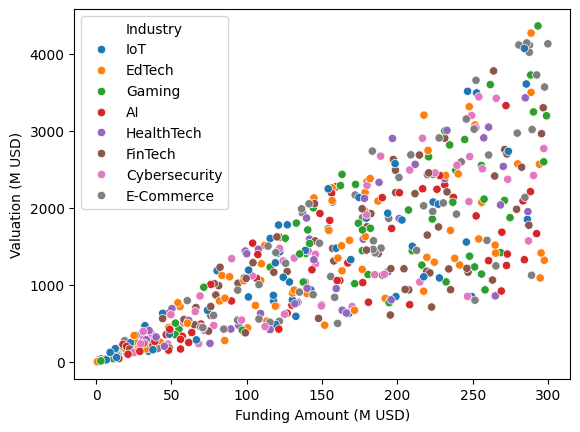

In [ ]:
# Scatter plot
sns.scatterplot(data=data, x="Funding Amount (M USD)", y="Valuation (M USD)", hue="Industry")


Profitability Analysis

In [ ]:
# % of profitable startups per region
data.groupby("Region")["Profitable"].mean() * 100


,Profitable
Region,
Asia,47.572816
Australia,48.148148
Europe,46.078431
North America,38.144330
South America,34.444444


Exit Status Comparison

<Axes: xlabel='Industry'>

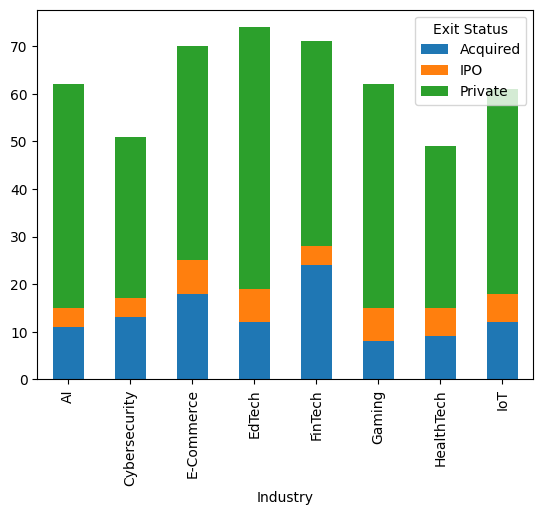

In [ ]:
# Count of exit types by industry
data.groupby(["Industry", "Exit Status"]).size().unstack().plot(kind="bar", stacked=True)


Revenue vs Employees

<Axes: xlabel='Employees', ylabel='Revenue (M USD)'>

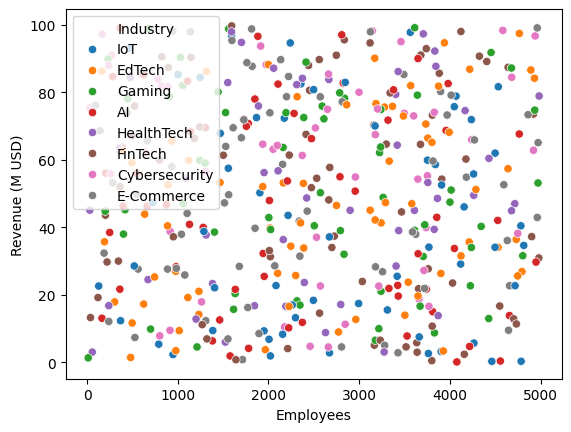

In [ ]:
# scatter plot
sns.scatterplot(data=data, x="Employees", y="Revenue (M USD)", hue="Industry")


Startup Count by Year

<Axes: ylabel='Market Share (%)'>

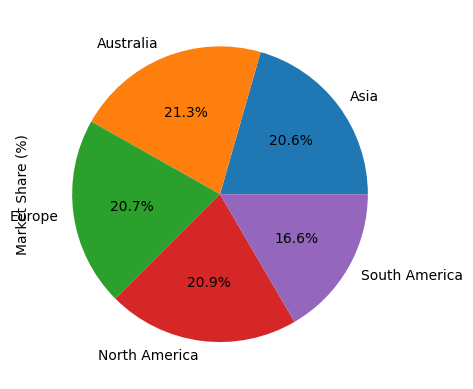

In [ ]:
# Pie chart
data.groupby("Region")["Market Share (%)"].sum().plot(kind="pie", autopct="%.1f%%")


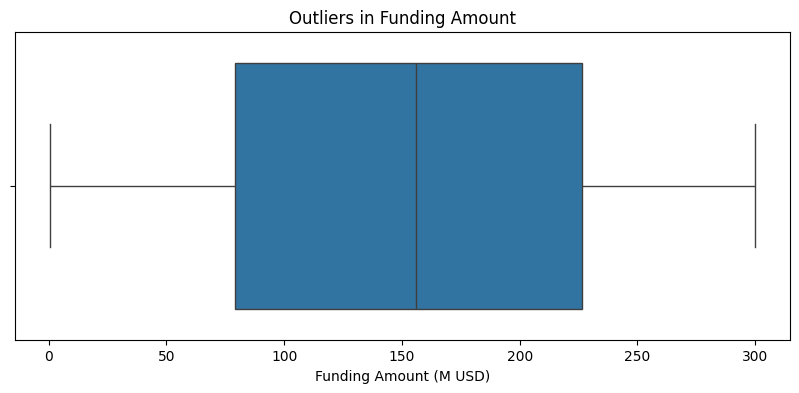

Outliers in Funding Amount:
 Empty DataFrame
Columns: [Startup Name, Funding Amount (M USD)]
Index: []


In [6]:
 # Plot a boxplot to visualize outliers
plt.figure(figsize=(10, 4))
sns.boxplot(x=data["Funding Amount (M USD)"])
plt.title("Outliers in Funding Amount")
plt.show()

# Print outliers using IQR
Q1 = data["Funding Amount (M USD)"].quantile(0.25)
Q3 = data["Funding Amount (M USD)"].quantile(0.75)
IQR = Q3 - Q1
outliers = data[(data["Funding Amount (M USD)"] < Q1 - 1.5 * IQR) | (data["Funding Amount (M USD)"] > Q3 + 1.5 * IQR)]
print("Outliers in Funding Amount:\n", outliers[["Startup Name", "Funding Amount (M USD)"]])


Average Funding by region

Region
North America    160.402990
South America    158.609778
Asia             156.760485
Australia        146.730000
Europe           142.169020
Name: Funding Amount (M USD), dtype: float64


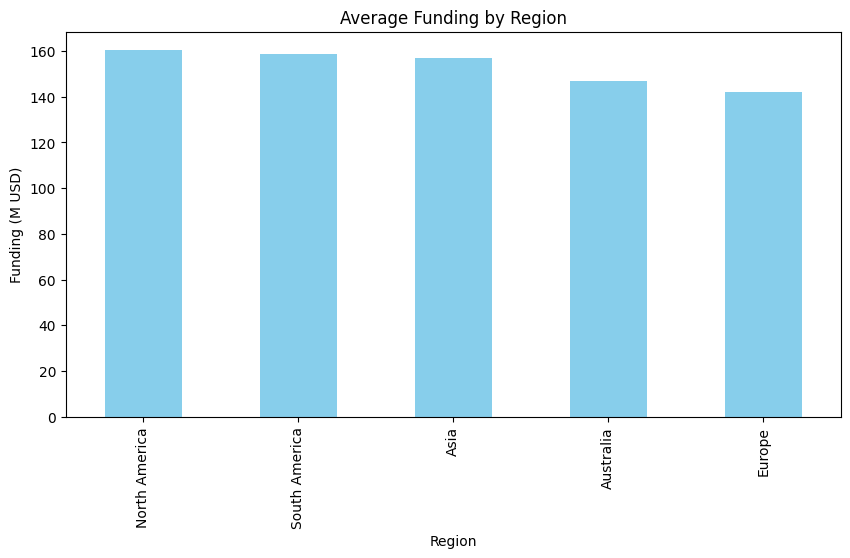

In [7]:
avg_funding = data.groupby("Region")["Funding Amount (M USD)"].mean().sort_values(ascending=False)
print(avg_funding)

# Visualization
avg_funding.plot(kind='bar', title="Average Funding by Region", ylabel="Funding (M USD)", figsize=(10, 5), color='skyblue')
plt.show()


Building a Regression Model to Predict Funding Amount

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Drop categorical columns for now
df_model = data.copy()
df_model = df_model.drop(columns=["Startup Name", "Industry", "Region", "Exit Status"])

# Split features and target
X = df_model.drop("Funding Amount (M USD)", axis=1)
y = df_model["Funding Amount (M USD)"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print("RMSE:", mean_squared_error(y_test, predictions))


RMSE: 2531.166774978594


Visualization of Profitability by Industry

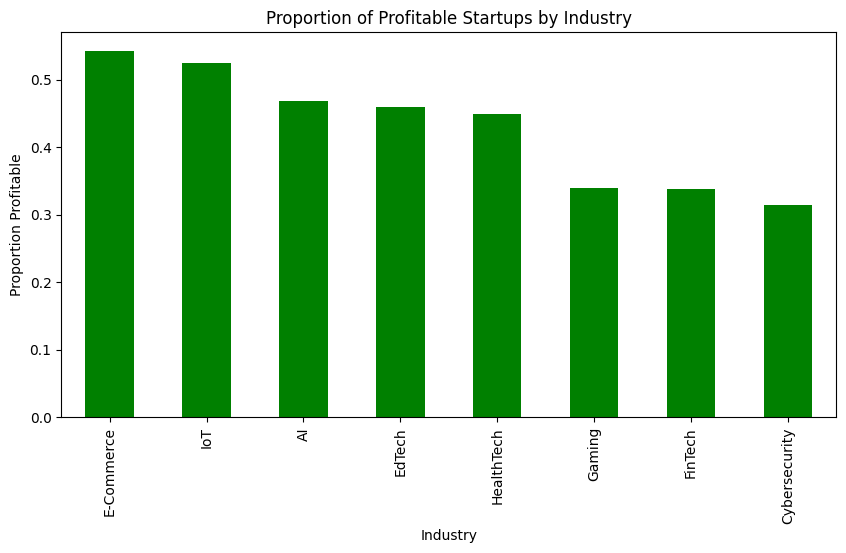

In [10]:
profit_by_industry = data.groupby("Industry")["Profitable"].mean().sort_values(ascending=False)
profit_by_industry.plot(kind='bar', title="Proportion of Profitable Startups by Industry", ylabel="Proportion Profitable", figsize=(10,5), color='green')
plt.show()
